# Deep Learning for the Geosciences (Technion 16837)

## Assignment #2b: Regression

In [10]:
import numpy as np # Importing the numpy package to perform calculations
import matplotlib.pyplot as plt # Importing the pyplot package to plot data
import sys

%matplotlib inline

# Import local files
sys.path.append('code')
from utils import *
from regression import *

# Do not change below! Important for reloading code you write in external .py files.
%load_ext autoreload 
%autoreload 2 

---
## <ins>Note about chatGPT </ins>
As always, you may use chatGPT to complete your assignments, if you indicate you did. However, since our goal here is not only to get a good grade - but also to learn something - I recommend that you first attempt to solve the assignment yourself and only then look at what ChatGPT has to offer. 

When choosing to use ChatGPT:
1. Please write your input prompt.
2. Try to understand the code instead of just copying it.
3. Explain the code in words. What does each line do? What is the expected input and output?

Important note: Failing to disclose the use of ChatGPT or similar AI tools in an assignment may lead to the loss of all points for the assignment.

---

In class, we saw that by differentiating the linear regression loss function and equating it to zero, we get:
$$ \vec{\theta} = (X^T X)^{-1} X^T \vec{y}$$

In class, we fit a polynomial:

$$ y^i = \theta_0 + \theta_1 \cdot x + \theta_2 \cdot x^2 + ... = \theta^T \cdot X$$

However, we can fit any data with a linear regression model - not just polynomial data.

In this exercise, you will fit a regression model to the CIFAR-10 imagery data we saw in class. Every pixel in an image can be thought of as a variable. For example, if we have $N$ images each composed of $m \times m$ pixels, we have $N \times m^2$ data points. To use regression, we are going  to assume these pixels are independent (is that a good assumption?).

Our $X$ (input) matrix will be [N,m^2], and our $y$ vector will be a vector of classes [N, 1].

In polynomial regression, our model already contains a bias term (a constant, $\theta_0$). In this assignment, you will have to introduce this constant manually:

$$X_{bias} = X + \vec{b}$$

# 1. <ins>Download the dataset</ins>

## <ins>Instructions for Downloading CIFAR-10 Dataset Manually</ins>

Follow these steps to download and prepare the CIFAR-10 dataset:

1. Go to the CIFAR-10 dataset website: [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Download the CIFAR-10 dataset Python version.
3. Extract the downloaded file.
4. Move the extracted folder to your project folder.
5. Create a directory called "data" to store the data. Data should contain 5 training batches (called data_batch_x) and one test batch.

In [14]:
data_dir = './data/'

# CIFAR-10 class labels
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the CIFAR-10 training data
X_train, y_train = load_training_data(data_dir)

# Validation: Print the shape of the loaded training data and labels
print(f"Shape of X_train: {X_train.shape}")  # Expected: (50000, 32, 32, 3)
print(f"Shape of y_train: {y_train.shape}")  # Expected: (50000,)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


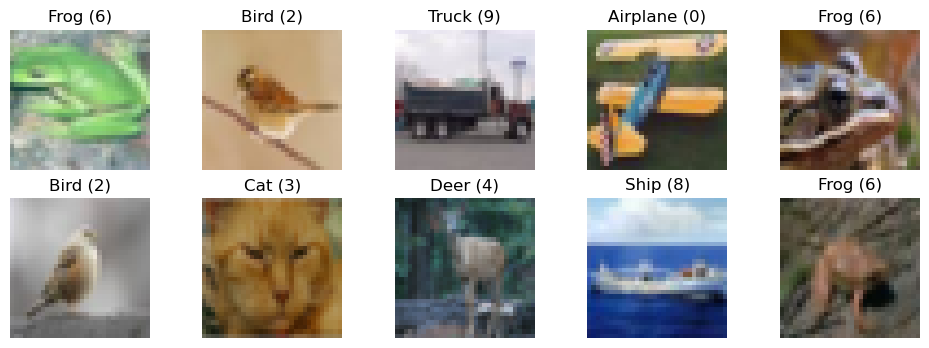

In [18]:
# Display 10 randomly selected images with label names
plt.figure(figsize=(12, 4))
indices = np.random.choice(len(X_train), 10, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"{label_names[y_train[idx]]} ({y_train[idx]})")
    plt.axis('off')
plt.show()

***
## <font color='lightgreen'>Answer the following questions</font>
1. What is the size of each image? Consider each image is an RGB 3-D array, as we have seen in class (so, three matrices).
2. If we fit these images using a regression model, treating each pixel as an independent variabe. What would be the size of theta, our parameter vector? Remember, in class we saw that for a polynomial, theta is related to the size of the highest polynomial degree. Here we do not fit a polynomial, but a regression model.

***

# 3. <ins>Fit a least-square model to the CIFAR-10 data</ins>

## <ins>3a. Complete the regression.py file </ins>
Implement the linear regression model we saw in class.

Explicitly implement two models: one with bias (a constant), and one without bias. Have the function receive an input value "use_bias" which will determine if it add a bias term or not.

## <ins>3b. Fit your linear regression model:</ins>
1. Flatten each image, and create a matrix X as we have seen in class. Matrix shape should be [number of images in dataset, number of pixels].
2. Use the function you wrote to fit the regression model:

(a) <ins>without</ins> bias.

In [20]:
# Preprocess and reshape the training data to fit the linear model
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
y_train_flat = y_train  # y_train is already the right shape

# Apply linear least squares to fit the model
theta = linear_least_squares(X_train_flat, y_train_flat, use_bias = False)

# Print theta to validate it has been computed
print(f"Computed theta shape: {theta.shape}")

Computed theta shape: (3072,)


### <ins>How good is the fit? </ins>

Calculate the training accuracy by computing:
$$ \hat{y} = X \cdot \vec{\theta} $$

and comparing $\hat{y}$ to $y$. As our classification data is descrete, you will need to round the value of $\hat{y}$.

In [22]:
### YOUR CODE GOES HERE
y_tag = X_train_flat@theta.reshape(-1,1)


accuracy = np.mean(np.round(y_tag,0) == y_train_flat) * 100


### YOUR CODE ENDS HERE

print(f"Training accuracy (without bias term): {accuracy:.2f}%")

Training accuracy (without bias term): 9.99%


(b) <ins>With</ins> bias

In [24]:
# Preprocess and reshape the training data to fit the linear model
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
y_train_flat = y_train  # y_train is already suitable for regression

# Apply linear least squares to fit the model
theta_b = linear_least_squares(X_train_flat, y_train_flat, use_bias = True)

# Print theta to validate it has been computed
print(f"Computed theta shape: {theta_b.shape}")

Computed theta shape: (3073,)


In [26]:
### YOUR CODE GOES HERE
X_train_flat_b = np.column_stack((X_train_flat, np.ones((X_train_flat.shape[0],1))))
y_tag = X_train_flat_b@theta_b.reshape(-1,1)
accuracy = np.mean(np.round(y_tag,0) == y_train_flat) * 100

### YOUR CODE ENDS HERE

print(f"Training accuracy (unstandardized data): {accuracy:.2f}%")

Training accuracy (unstandardized data): 9.99%


***
## <font color='lightgreen'>Answer the following questions</font>
1. What is the size of $\theta$ without bias? With bias? Explicitly write your calculation.
2. Why are they different? 

***

***

הגודל של תטא ללא הבייס הוא 3072 (כמות הפיקסלים בתמונה - 32,32,3) - כל פיקסל הוא נעלם ולכן כל איבר בתטא הוא המקדם של אותו נעלם.
כאשר אנחנו מוסיפים את הבייס הגודל של תטא יהיה 3073 - מקדם עבור כל פיקסל והבייס עצמו אשר נכפול ב1

ההבדל נובע מעצם כך שהבייס מוסיף לנו עוד נעלם שאנחנו מחשבים ברגרסיה הלינארית.

***

## <ins>3d. Now standardize the data, and fit again. What is the training accuracy?</ins>

In [28]:
### YOUR CODE GOES HERE

X_train_standardized =4* (X_train_flat - np.min(X_train_flat, axis = 1).reshape(-1,1)) / np.max((X_train_flat - np.min(X_train_flat, axis = 1).reshape(-1,1)), axis = 1).reshape(-1,1) - 2


### YOUR CODE ENDS HERE

# If you standardized your data correctly, the mean should be zero and the standard deviation 1:
print("Your mean is " + str(np.mean(X_train_standardized)))
print("Your std is " + str(np.std(X_train_standardized)))



Your mean is -0.08760920508380736
Your std is 1.071793338408538


In [30]:
# Apply linear least squares to fit the model
theta_bn = linear_least_squares(X_train_standardized, y_train_flat, use_bias = True)

# Print theta to validate it has been computed
print(f"Computed theta shape: {theta_bn.shape}")

Computed theta shape: (3073,)


In [32]:
### YOUR CODE GOES HERE

X_train_flat_bn = np.column_stack((X_train_flat, np.ones((X_train_flat.shape[0],1))))
y_tag = X_train_flat_bn@theta_bn.reshape(-1,1)
accuracy = np.mean(np.round(y_tag,0) == y_train_flat) * 100

### YOUR CODE ENDS HERE

print(f"Training accuracy (standardized data): {accuracy:.2f}%")

Training accuracy (standardized data): 10.00%


***
## <font color='lightgreen'>Answer the following questions</font>
1. Which accuracy is higher, that of the standized or the non-standarized data?
2. Can you guess why?

***

***
לא היה שינוי בדיוק, בגלל שערכי הפיקסלים מראש בין 0 ל1, כלומר באופן יחסי מנורמלים.

אם הערכים היו בין 0 ל255 (הייצוג השני של צבעים) ניתן להניח כי הנרמול היה משפר את התוצאה כי היה משפר היציבות הנומרית של המטריצות שלנו.

***

# 4. <ins>Test your regression model</ins>


## <ins>4a. Load the testing dataset<ins>
Use the standardized model with the bias term as your model of choice. Don't forget to standardize the test data and add a bias term!

In [34]:
### 1. Load the test data (assuming you have a similar function or process as for the training data)
### YOUR CODE GOES HERE
X_test, y_test = load_testing_data(data_dir)

### YOUR CODE ENDS HERE

### 2. Flatten the test images
### YOUR CODE GOES HERE
X_test_flat = X_test.reshape(X_test.shape[0], -1)
Y_test_flat = y_test
### YOUR CODE ENDS HERE

### 3. If needed, standardize:
### YOUR CODE GOES HERE
X_test_standardized =4* (X_test_flat - np.min(X_test_flat, axis = 1).reshape(-1,1)) / np.max((X_test_flat - np.min(X_test_flat, axis = 1).reshape(-1,1)), axis = 1).reshape(-1,1) - 2

### YOUR CODE ENDS HERE

## <ins>4b. Test your model accuracy</ins>

In [36]:
### YOUR CODE GOES HERE

X_test_flat_b = np.column_stack((X_test_standardized, np.ones((X_test_standardized.shape[0],1))))
y_tag = X_test_flat_b@theta_bn.reshape(-1,1)
test_accuracy = np.mean(np.round(y_tag,0) == Y_test_flat) * 100

### YOUR CODE ENDS HERE

print(f"Test accuracy (standardized data): {test_accuracy}%")

Test accuracy (standardized data): 9.993%


## <ins>4c. Now test your model accuracy for each class</ins>
<font color='red'>Extra credit</font>: Write code to visualize a few (4-5) testing samples from each class, to help you get a sense of the model accuracy (5 pt).

In [38]:
# Initialize an array to hold accuracy for each class
class_accuracies = np.zeros(10)


### YOUR CODE GOES HERE

for j in range(10):
    X_test_flat_bj = np.column_stack((X_test_flat, np.ones((X_test_flat.shape[0],1))))[Y_test_flat == j]
    y_tag = X_test_flat_b@theta_bn.reshape(-1,1)
    test_accuracy = np.mean(np.round(y_tag,0) == j) * 100
    class_accuracies[j] = test_accuracy
### YOUR CODE ENDS HERE

# Print accuracy for each class
for i, class_accuracy in enumerate(class_accuracies):
    print(f"Accuracy for class {label_names[i]}: {class_accuracy:.2f}%")

Accuracy for class Airplane: 0.09%
Accuracy for class Automobile: 0.36%
Accuracy for class Bird: 2.76%
Accuracy for class Cat: 14.32%
Accuracy for class Deer: 32.65%
Accuracy for class Dog: 31.84%
Accuracy for class Frog: 13.58%
Accuracy for class Horse: 3.35%
Accuracy for class Ship: 0.74%
Accuracy for class Truck: 0.24%


In [40]:
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

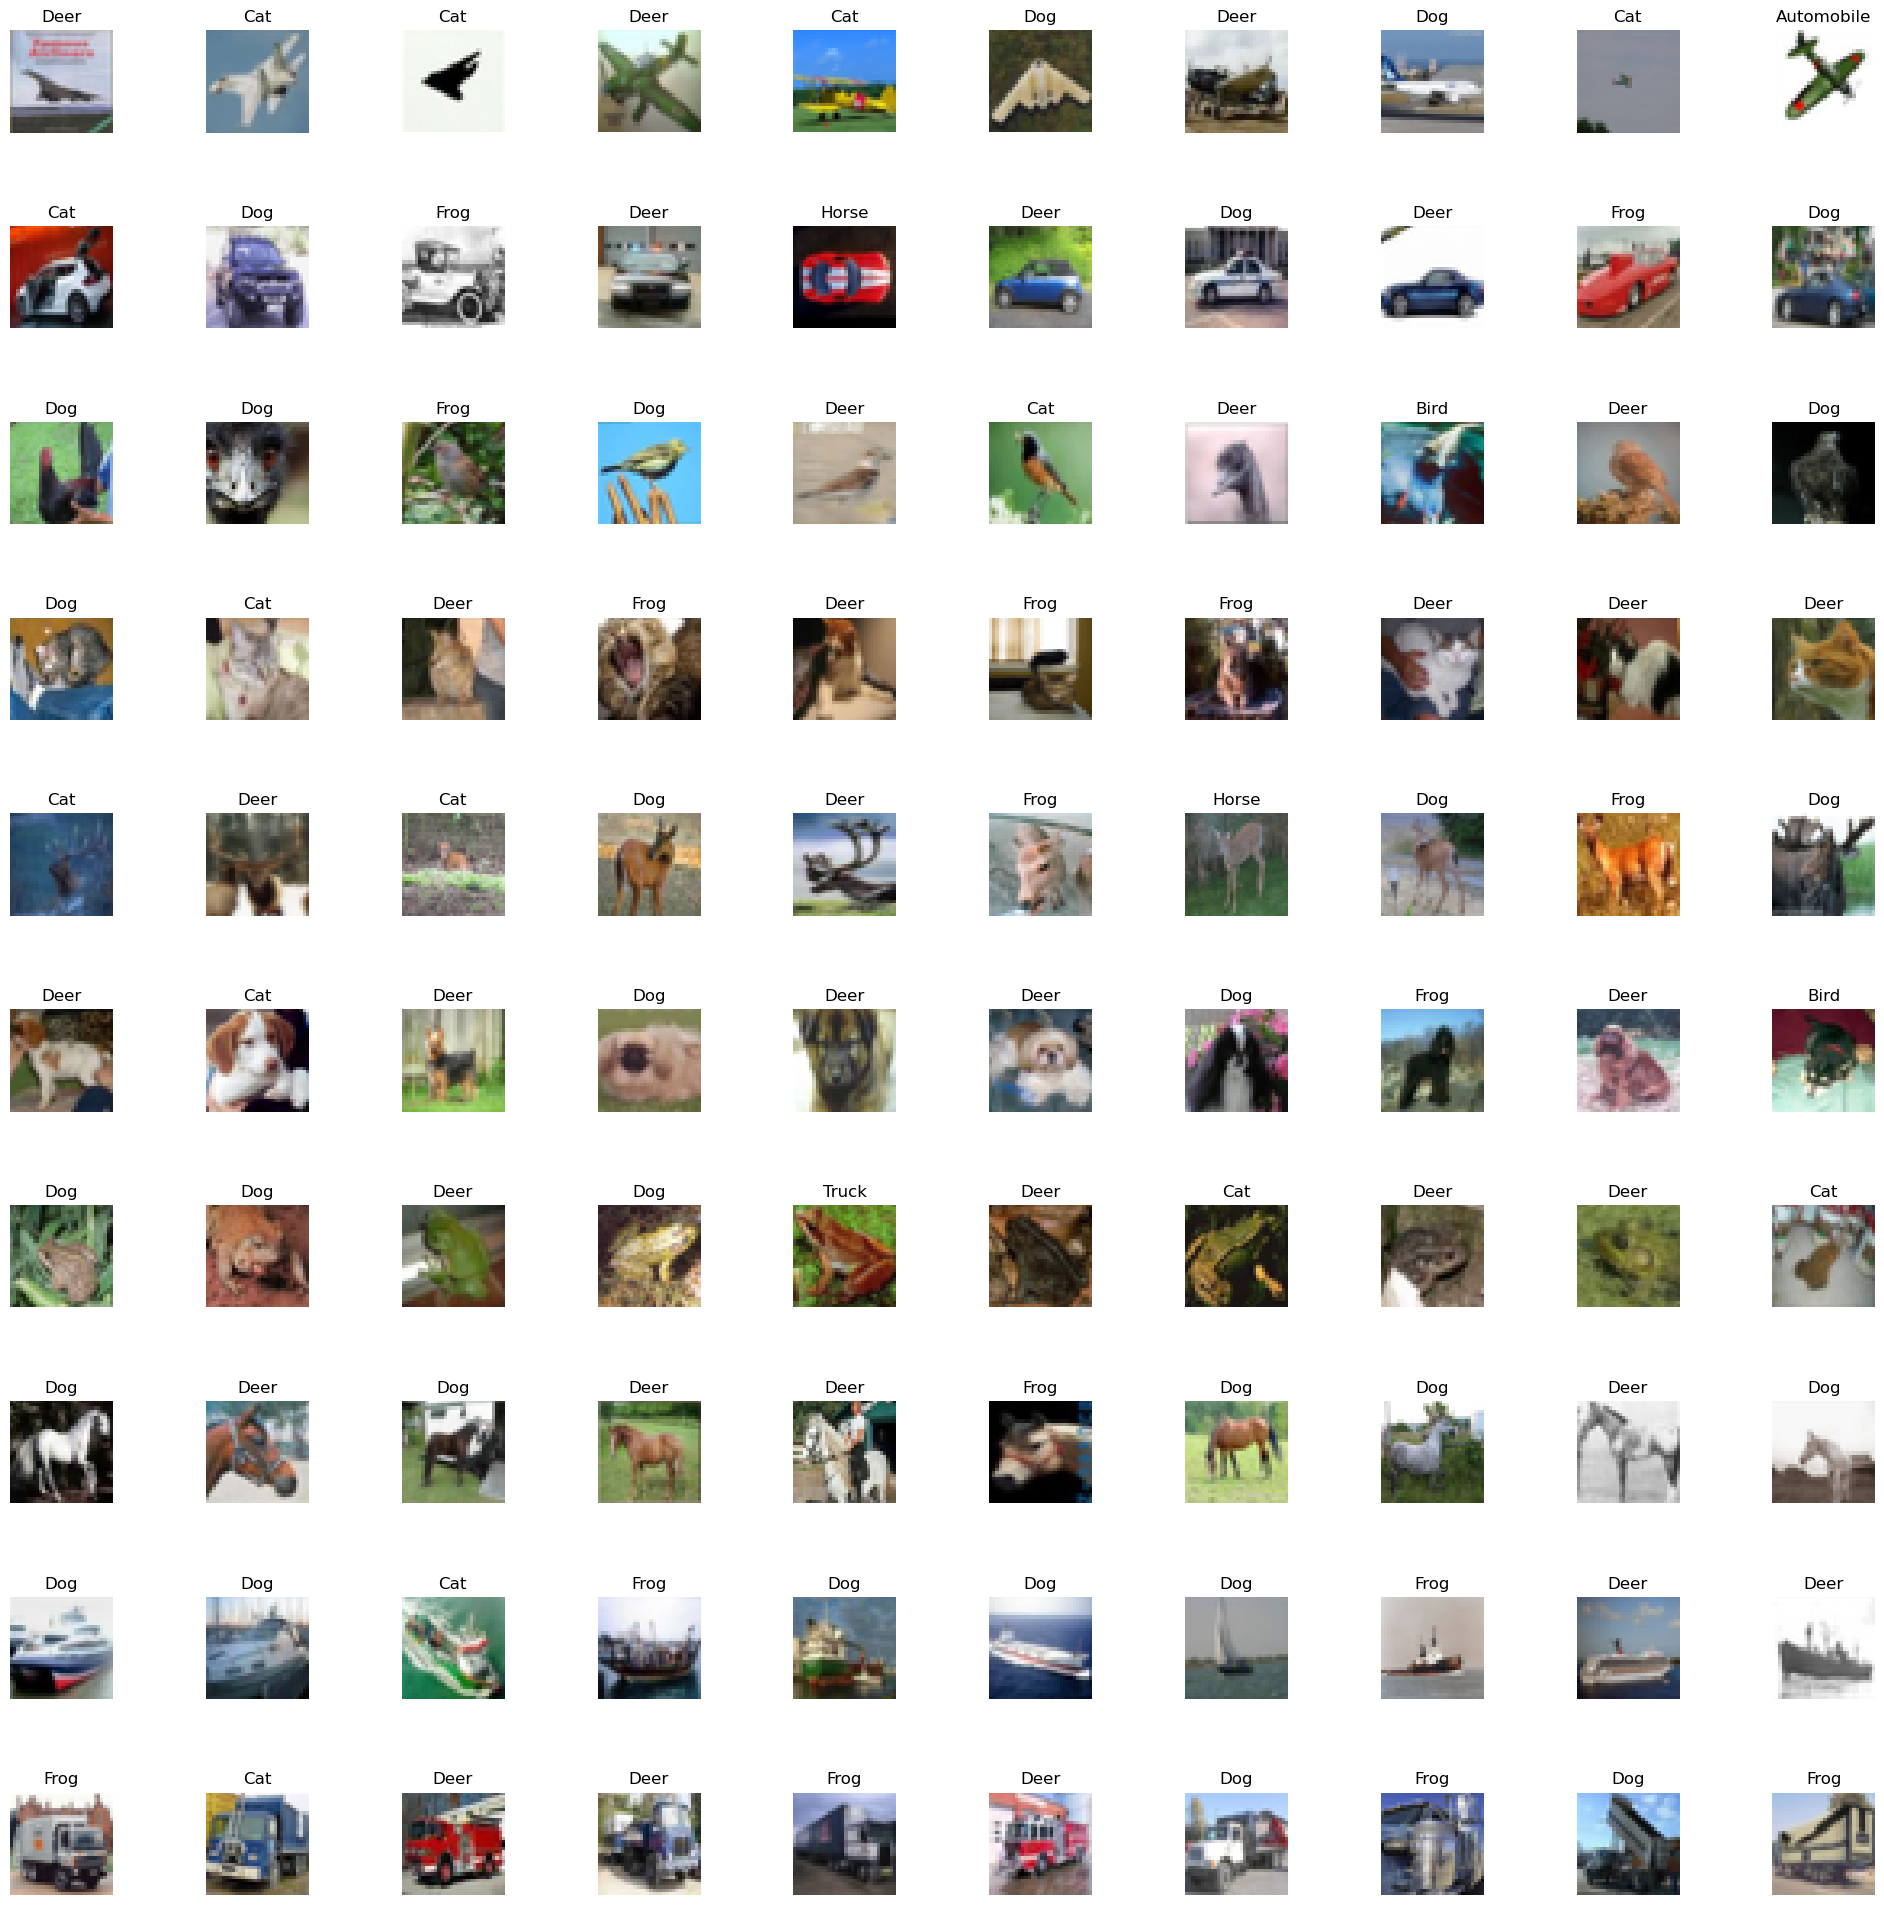

In [52]:
## Write code to visualize the data

# Initialize the plot
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=3.0)

### YOUR CODE GOES HERE
for i in range(10):
    for j in range(10):
        axes[i, j].imshow((X_test[Y_test_flat == i])[j,:,:,:])
        labelInx = label_names[int(np.round(y_tag[Y_test_flat == i][j])[0])]
        axes[i, j].set_title(f"{labelInx}")
        axes[i, j].axis('off')

### YOUR CODE ENDS HERE

plt.show()


***
## <font color='lightgreen'>Answer the following questions</font>
Discuss your results. A few thinking points:
1. Is the accuracy better or worse than just a random guess? What does that tell you about the use of linear regression models in classifying images?
2. Which linear regression model perfomed best? With/without bias? How did standardization affect the trainig accuracy?
3. Why in your opinion our regression model did not perform well?
4. Preprocessing is the action of manipulating the data before training. For example, increasing the contrast of an image. We did almost no preprocessing on the data. Which preprocessing do you think would have improved the accuracy? Suggest a method, and explain it.
<font color='red'> Extra credit: </font> 5 pt for each method you suggest and explain
***

***
1. הדיוק שקיבלנו הוא כ-10%, בגלל שיש לנו 10 קבוצות נראה שזה די דומה לאחוזים שנקבל עבור ניחוש רנדומלי לחלוטין שכן יש הסתברות של 0.1 לבחור כל אחד מהקבוצות. נראה שהשיטה הנ"ל לא מתאימה לסיווג תמונות שכן אי אפשר להתייחס לתמונה כבעיה לינארית. לא עזר לבעיה הנרמול של הערכים או נעלם הבייס.
2. כל השיטות הביאו לי תוצאות דומות. כפי שכבר כתבתי, ניתן להניח כי הנרמול יעזור עבור תמונות  עם ערכים שבין 0ל255.
3. להערכתי השיטה לא עובדת טוב בגלל שיש יותר מידי מימדים והקשר בין התמונות מורכב מידי עבור תיאור הבעיה באופן לינארי.
4. ייתכן שחישוב הספים של האובייקטים התמונה הייתה עוזרת לסנן את המידע הרלוונטי עבור הסיווג. על מנת לקבל את ערכים אלו הייתי מציע לעשות קונבולוציה של נגזרת על פני כל התמונות ולשנות את הקלט להיות תוצאות הקונבולוציה.
***